## INM426: Software Agents: Implementing Q-learning for Table Football
This notebook implements a Q-learning algorithm for a table football game. First we do a single walkthrough example, then run a couple of experiments.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import math

We first initialize the rewards matrix R, and a Q matrix of zeroes with same dimensionality as R. For now, we use negative infinity to denote null states and we'll write a conditional statement later to prevent these states from being accessed. 

In [2]:
# defines the reward/connection graph
x = -math.inf
R1 = np.array([[x, -5, -5, x, x, x, x, x, x, x, x, 10],
              [x, x, x, -5, -5, -5, -5, -20, x, x, x, 25],
              [x, x, x, -20, -5, -5, -5, -5, x, x, x, 25],
              [x, x, x, x, x, x, x, x, -5, -5, -10, 50],
              [x, x, x, x, x, x, x, x, -5, -5, -5, 50],
              [x, x, x, x, x, x, x, x, -5, -5, -5, 50],
              [x, x, x, x, x, x, x, x, -5, -5, -5, 50],
              [x, x, x, x, x, x, x, x, -10, -5, -5, 50],
              [x, x, x, x, x, x, x, x, x, x, x, 75],
              [x, x, x, x, x, x, x, x, x, x, x, 100],
              [x, x, x, x, x, x, x, x, x, x, x, 75],
              [x, x, x, x, x, x, x, x, x, x, x, 0]]).astype("float32")
R = R1
Q = np.zeros_like(R)

Next we initialize our learning policy parameters epsilon and lambda, and our Q-learning parameters, alpha and gamma, and also the number of training episodes.

In [3]:
eps = 0.99
lamb = 0.001
alpha = 0.7
gamma = 0.3
episodes = 500

Randomly initialize a state and implement epsilon-greedy policy:

In [4]:
state = np.random.randint(12) # Start with a random state from 0 to 11.
print("Initial state is", state)
print("Possible actions are ", [num for num in range(12) if R[state, num] > -100])
p = np.random.uniform() # Random number from 0 to 1. 
print(p)
if eps > p:
    print('Action is Explore!')
    action = np.random.choice([num for num in range(12) if R[state, num] > -100])
else:
    print('Action is Exploit!')
    mask = (R[state, :] > -100) # A neat masking trick that allows np.argmax to use conditionals!
    subset_idx = np.argmax(Q[state, :][mask]) 
    action = np.arange(Q.shape[0])[mask][subset_idx]
print("Move to state", action)

Initial state is 0
Possible actions are  [1, 2, 11]
0.22387295809219598
Action is Explore!
Move to state 11


Update the Q-matrix:

In [5]:
next_state = action
Q[state, action] += alpha* (R[state, action] + gamma * np.max(Q[next_state, :]) - Q[state, action])
print(Q)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  7.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


Update epsilon for the next learning episode:

In [6]:
eps = eps * (1 - lamb)

### Now run some experiments!
That completes a single pass! For the entire Q-learning algorithm, we run the above steps for N = number of episodes. First we put all the steps together in a single function to make it easier to change parameters and iterate.

In [7]:
def calculateQ(eps, lamb, alpha, gamma, episodes):
    Q = np.zeros_like(R) # Resets the Q-matrix
    scores = []
    cumulative_reward = 0
    step = 0
    for epi in range(episodes):
        state = np.random.randint(12) # Start with a random state from 0 to 11.
        while(True):
            p = np.random.uniform() # Random number from 0 to 1. 
            if eps > p:
                #Explore:
                action = np.random.choice([num for num in range(12) if R[state, num] > -100])
            else:
                #Exploit:
                mask = (R[state, :] > -100) # A neat masking trick that allows np.argmax to use conditionals!
                subset_idx = np.argmax(Q[state, :][mask]) 
                action = np.arange(Q.shape[0])[mask][subset_idx]
            next_state = action
            Q[state, action] += alpha* (R[state, action] + gamma * np.max(Q[next_state, :]) - Q[state, action])
            cumulative_reward += R[state,action]
            step += 1
            eps = eps * (1 - lamb)
            if state == 11:
                score = cumulative_reward/step
                scores.append(score)
                break
            state = next_state   
    Q = np.array([round(num) for li in Q for num in li])
    Q = Q.reshape((12,12))
    return Q, scores

In [8]:
myQ, myScores = calculateQ(eps=0.9, lamb=0.001, alpha=0.5, gamma=0.7, episodes=3000)
print(myQ)

[[   0.   23.   23.    0.    0.    0.    0.    0.    0.    0.    0.   10.]
 [   0.    0.    0.   39.   38.   40.   40.   25.    0.    0.    0.   25.]
 [   0.    0.    0.   24.   40.   40.   40.   28.    0.    0.    0.   24.]
 [   0.    0.    0.    0.    0.    0.    0.    0.   47.   65.   40.   49.]
 [   0.    0.    0.    0.    0.    0.    0.    0.   47.   65.   47.   47.]
 [   0.    0.    0.    0.    0.    0.    0.    0.   47.   65.   47.   48.]
 [   0.    0.    0.    0.    0.    0.    0.    0.   47.   65.   47.   50.]
 [   0.    0.    0.    0.    0.    0.    0.    0.   42.   65.   47.   50.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   75.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  100.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   75.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]]


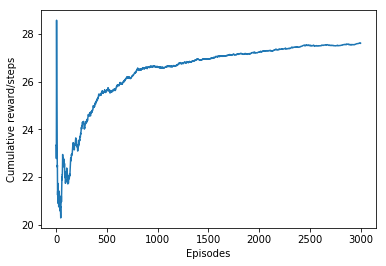

In [9]:
plt.plot(myScores)
plt.xlabel('Episodes')
plt.ylabel('Cumulative reward/steps')
plt.show()

The following cells print out what the agent has learned are the optimal paths from each starting point. The code for displaying the paths was written by Anshumaan Parashar and used here with permission. The original version of these functions is available at https://github.com/Wert1996/Painless-Q-Learning/blob/master/printOptimalPaths.py 

In [10]:
def calculatePaths(Q):
    paths = []
    maxInd = np.argmax(Q, axis = 1)
    for i in range(12):
        curPath = []
        curPath.append(str(i))
        current = i
        while(current != 11):
            current = maxInd[current]
            curPath.append(str(current))
        paths.append("->".join(curPath))
    return paths

In [11]:
paths = calculatePaths(myQ)
for start_spot in range(12):
    print(paths[start_spot])

0->1->5->9->11
1->5->9->11
2->4->9->11
3->9->11
4->9->11
5->9->11
6->9->11
7->9->11
8->11
9->11
10->11
11


### Experiments with different parameters - no early stopping

Case 0 (base case): eps=0.9, lamb=0.001, alpha=0.5, gamma=0.7

Case 1 (high epsilon, explore over exploit): eps=0.999, lamb=0.001, alpha=0.5, gamma=0.7

Case 2 (low epsilon, favours exploit over explore): eps=0.001, lamb=0.001, alpha=0.5, gamma=0.7

Case 3 (high alpha, update with full value of future rewards): eps=0.9, lamb=0.001, alpha=0.999, gamma=0.7

Case 4 (low alpha, learn slowly): eps=0.9, lamb=0.001, alpha=0.001, gamma=0.7

Case 5 (high gamma, favour future rewards): eps=0.9, lamb=0.001, alpha=0.5, gamma=0.999

Case 6 (low gamma, discount future rewards): eps=0.9, lamb=0.001, alpha=0.5, gamma=0.001

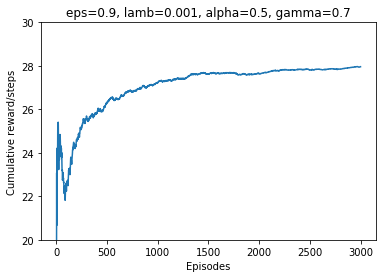

0->1->5->9->11
1->5->9->11
2->5->9->11
3->9->11
4->9->11
5->9->11
6->9->11
7->9->11
8->11
9->11
10->11
11


In [12]:
#Case 0
myQ, myScores = calculateQ(eps=0.9, lamb=0.001, alpha=0.5, gamma=0.7, episodes=3000)
plt.plot(myScores)
plt.title('eps=0.9, lamb=0.001, alpha=0.5, gamma=0.7')
plt.xlabel('Episodes')
plt.ylabel('Cumulative reward/steps')
plt.ylim(20,30)
plt.show()
paths = calculatePaths(myQ)
for start_spot in range(12):
    print(paths[start_spot])

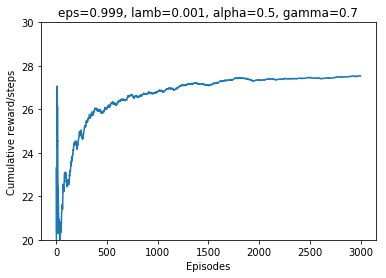

0->1->3->9->11
1->3->9->11
2->6->9->11
3->9->11
4->9->11
5->9->11
6->9->11
7->9->11
8->11
9->11
10->11
11


In [13]:
#Case 1
myQ, myScores = calculateQ(eps=0.999, lamb=0.001, alpha=0.5, gamma=0.7, episodes=3000)
plt.plot(myScores)
plt.title('eps=0.999, lamb=0.001, alpha=0.5, gamma=0.7')
plt.xlabel('Episodes')
plt.ylabel('Cumulative reward/steps')
plt.ylim(20,30)
plt.show()
paths = calculatePaths(myQ)
for start_spot in range(12):
    print(paths[start_spot])

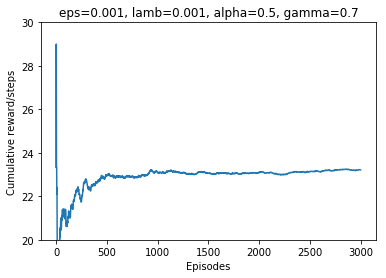

0->11
1->4->8->11
2->3->8->11
3->8->11
4->8->11
5->8->11
6->9->11
7->8->11
8->11
9->11
10->11
11


In [14]:
#Case 2
myQ, myScores = calculateQ(eps=0.001, lamb=0.001, alpha=0.5, gamma=0.7, episodes=3000)
plt.plot(myScores)
plt.title('eps=0.001, lamb=0.001, alpha=0.5, gamma=0.7')
plt.xlabel('Episodes')
plt.ylabel('Cumulative reward/steps')
plt.ylim(20,30)
plt.show()
paths = calculatePaths(myQ)
for start_spot in range(12):
    print(paths[start_spot])

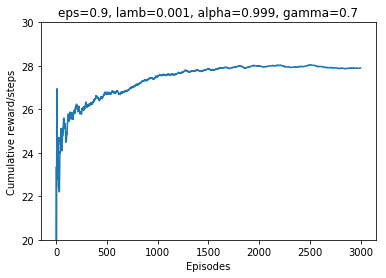

0->1->3->9->11
1->3->9->11
2->4->9->11
3->9->11
4->9->11
5->9->11
6->9->11
7->9->11
8->11
9->11
10->11
11


In [15]:
#Case 3
myQ, myScores = calculateQ(eps=0.9, lamb=0.001, alpha=0.999, gamma=0.7, episodes=3000)
plt.plot(myScores)
plt.title('eps=0.9, lamb=0.001, alpha=0.999, gamma=0.7')
plt.xlabel('Episodes')
plt.ylabel('Cumulative reward/steps')
plt.ylim(20,30)
plt.show()
paths = calculatePaths(myQ)
for start_spot in range(12):
    print(paths[start_spot])

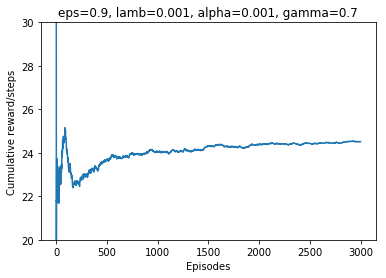

0->11
1->11
2->11
3->11
4->11
5->11
6->11
7->11
8->11
9->11
10->11
11


In [16]:
#Case 4
myQ, myScores = calculateQ(eps=0.9, lamb=0.001, alpha=0.001, gamma=0.7, episodes=3000)
plt.plot(myScores)
plt.title('eps=0.9, lamb=0.001, alpha=0.001, gamma=0.7')
plt.xlabel('Episodes')
plt.ylabel('Cumulative reward/steps')
plt.ylim(20,30)
plt.show()
paths = calculatePaths(myQ)
for start_spot in range(12):
    print(paths[start_spot])

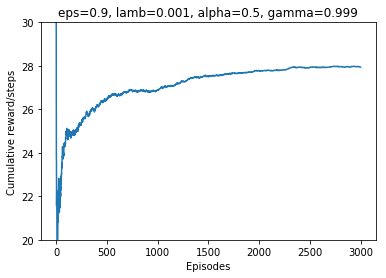

0->2->6->9->11
1->4->9->11
2->6->9->11
3->9->11
4->9->11
5->9->11
6->9->11
7->9->11
8->11
9->11
10->11
11


In [17]:
#Case 5
myQ, myScores = calculateQ(eps=0.9, lamb=0.001, alpha=0.5, gamma=0.999, episodes=3000)
plt.plot(myScores)
plt.title('eps=0.9, lamb=0.001, alpha=0.5, gamma=0.999')
plt.xlabel('Episodes')
plt.ylabel('Cumulative reward/steps')
plt.ylim(20,30)
plt.show()
paths = calculatePaths(myQ)
for start_spot in range(12):
    print(paths[start_spot])

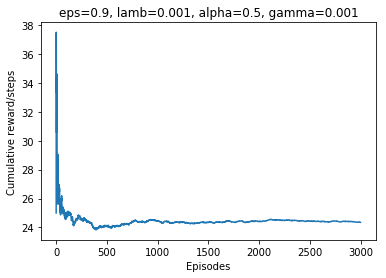

0->11
1->11
2->11
3->11
4->11
5->11
6->11
7->11
8->11
9->11
10->11
11


In [18]:
#Case 6
myQ, myScores = calculateQ(eps=0.9, lamb=0.001, alpha=0.5, gamma=0.001, episodes=3000)
plt.plot(myScores)
plt.title('eps=0.9, lamb=0.001, alpha=0.5, gamma=0.001')
plt.xlabel('Episodes')
plt.ylabel('Cumulative reward/steps')
plt.show()
paths = calculatePaths(myQ)
for start_spot in range(12):
    print(paths[start_spot])

### Further experiments - new rewards matrix

In [19]:
R2 = np.array([[0, -5, -5, -10, -10, -10, -10, -10, -20, -20, -20, 10],
              [-50, 0, -5, -5, -5, -5, -5, -20, -20, -20, -20, 25],
              [-50, -5, 0, -20, -5, -5, -5, -5, -20, -20, -20, 25],
              [-50, -5, -20, 0, -5, -5, -5, -5, -5, -5, -10, 50],
              [-50, -5, -5, -5, 0, -5, -5, -5, -5, -5, -5, 50],
              [-50, -5, -5, -5, -5, 0, -5, -5, -5, -5, -5, 50],
              [-50, -5, -5, -5, -5, -5, 0, -5, -5, -5, -5, 50],
              [-50, -20, -5, -5, -5, -5, -5, 0, -10, -5, -5, 50],
              [-50, -20, -20, -5, -5, -5, -5, -10, 0, -5, -5, 75],
              [-50, -20, -20, -5, -5, -5, -5, -5, -5, 0, -5, 100],
              [-50, -20, -20, -10, -5, -5, -5, -5, -5, -5, 0, 75],
              [x, x, x, x, x, x, x, x, x, x, x, 0]]).astype("float32")
R = R2

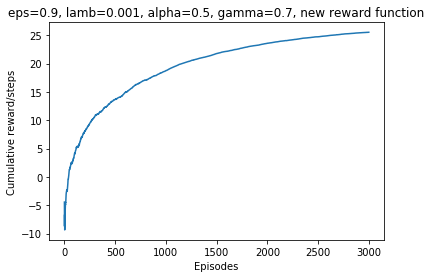

0->9->11
1->9->11
2->9->11
3->11
4->9->11
5->9->11
6->11
7->9->11
8->11
9->11
10->11
11


In [20]:
#Case 7
myQ, myScores = calculateQ(eps=0.9, lamb=0.001, alpha=0.5, gamma=0.7, episodes=3000)
plt.plot(myScores)
plt.title('eps=0.9, lamb=0.001, alpha=0.5, gamma=0.7, new reward function')
plt.xlabel('Episodes')
plt.ylabel('Cumulative reward/steps')
plt.show()
paths = calculatePaths(myQ)
for start_spot in range(12):
    print(paths[start_spot])

### Experiments with early stopping

Uses variance of performance of last 10 episodes as a stopping criterion. Run each case above 10 times, and report the mean and standard deviation of the number of episodes for convergence, and mean and standard deviation of the performance.

In [21]:
#Reset R-matrix:
R = R1

In [22]:
def calculateQ_earlystop(eps, lamb, alpha, gamma):
    Q = np.zeros_like(R) # Resets the Q-matrix
    scores = list(range(1,11))
    cumulative_reward = 0
    step = 0
    while np.var(scores[-11:-1]) > 0.00001:    
        state = np.random.randint(12) # Start with a random state from 0 to 11.
        while(True):
            p = np.random.uniform() # Random number from 0 to 1. 
            if eps > p:
                #Explore:
                action = np.random.choice([num for num in range(12) if R[state, num] > -100])
            else:
                #Exploit:
                mask = (R[state, :] > -100) # A neat masking trick that allows np.argmax to use conditionals!
                subset_idx = np.argmax(Q[state, :][mask]) 
                action = np.arange(Q.shape[0])[mask][subset_idx]
            next_state = action
            Q[state, action] += alpha* (R[state, action] + gamma * np.max(Q[next_state, :]) - Q[state, action])
            cumulative_reward += R[state,action]
            step += 1
            eps = eps * (1 - lamb)
            if state == 11:
                score = cumulative_reward/step
                scores.append(score)
                break
            state = next_state
    Q = np.array([round(num) for li in Q for num in li])
    Q = Q.reshape((12,12))
    del scores[:10]
    return scores

In [23]:
#Case 0
episodes_to_converge = []
performance = []
for k in range(10):
    myScores = calculateQ_earlystop(eps=0.9, lamb=0.001, alpha=0.5, gamma=0.7)
    episodes_to_converge.append(len(myScores))
    performance.append(myScores[-1])

print(np.mean(episodes_to_converge))
print(np.std(episodes_to_converge))
print(np.mean(performance))
print(np.std(performance))

1454.2
171.891128334
27.3035125826
0.328506715459


In [24]:
#Case 1
episodes_to_converge = []
performance = []
for k in range(10):
    myScores = calculateQ_earlystop(eps=0.999, lamb=0.001, alpha=0.5, gamma=0.7)
    episodes_to_converge.append(len(myScores))
    performance.append(myScores[-1])
    
print(np.mean(episodes_to_converge))
print(np.std(episodes_to_converge))
print(np.mean(performance))
print(np.std(performance))

1385.9
130.290790158
27.0746911161
0.261628578964


In [25]:
#Case 2
episodes_to_converge = []
performance = []
for k in range(10):
    myScores = calculateQ_earlystop(eps=0.001, lamb=0.001, alpha=0.5, gamma=0.7)
    episodes_to_converge.append(len(myScores))
    performance.append(myScores[-1])
    
print(np.mean(episodes_to_converge))
print(np.std(episodes_to_converge))
print(np.mean(performance))
print(np.std(performance))

1421.1
250.142139593
22.9449357801
0.718858908137


In [26]:
#Case 3
episodes_to_converge = []
performance = []
for k in range(10):
    myScores = calculateQ_earlystop(eps=0.9, lamb=0.001, alpha=0.999, gamma=0.7)
    episodes_to_converge.append(len(myScores))
    performance.append(myScores[-1])
    
print(np.mean(episodes_to_converge))
print(np.std(episodes_to_converge))
print(np.mean(performance))
print(np.std(performance))

1431.4
161.21488765
27.3701529935
0.24576858845


In [27]:
#Case 4
episodes_to_converge = []
performance = []
for k in range(10):
    myScores = calculateQ_earlystop(eps=0.9, lamb=0.001, alpha=0.001, gamma=0.7)
    episodes_to_converge.append(len(myScores))
    performance.append(myScores[-1])
    
print(np.mean(episodes_to_converge))
print(np.std(episodes_to_converge))
print(np.mean(performance))
print(np.std(performance))

1437.8
293.940742327
24.0723596223
0.264245282125


In [28]:
#Case 5
episodes_to_converge = []
performance = []
for k in range(10):
    myScores = calculateQ_earlystop(eps=0.9, lamb=0.001, alpha=0.5, gamma=0.999)
    episodes_to_converge.append(len(myScores))
    performance.append(myScores[-1])
    
print(np.mean(episodes_to_converge))
print(np.std(episodes_to_converge))
print(np.mean(performance))
print(np.std(performance))

1443.3
114.049156069
27.3025665145
0.287849328577


In [29]:
#Case 6
episodes_to_converge = []
performance = []
for k in range(10):
    myScores = calculateQ_earlystop(eps=0.9, lamb=0.001, alpha=0.5, gamma=0.001)
    episodes_to_converge.append(len(myScores))
    performance.append(myScores[-1])
    
print(np.mean(episodes_to_converge))
print(np.std(episodes_to_converge))
print(np.mean(performance))
print(np.std(performance))

1523.7
167.335620834
24.1658536811
0.265626712425


In [30]:
#Case 7
R = R2
episodes_to_converge = []
performance = []
for k in range(10):
    myScores = calculateQ_earlystop(eps=0.9, lamb=0.001, alpha=0.5, gamma=0.7)
    episodes_to_converge.append(len(myScores))
    performance.append(myScores[-1])
    
print(np.mean(episodes_to_converge))
print(np.std(episodes_to_converge))
print(np.mean(performance))
print(np.std(performance))

1667.4
117.706584353
23.0574954595
1.15884656865


### Advanced reinforcement learning technique - Sarsa

In [31]:
def calculateQ_sarsa(eps, lamb, alpha, gamma, episodes):
    Q = np.zeros_like(R) # Resets the Q-matrix
    scores = []
    cumulative_reward = 0
    step = 0

    for epi in range(episodes):
        # Initialize s:
        state = np.random.randint(12) # Start with a random state from 0 to 11.
        
        # Choose a from s using policy derived from Q:
        p = np.random.uniform() # Random number from 0 to 1. 
        if eps > p:
            #Explore:
            action = np.random.choice([num for num in range(12) if R[state, num] > -100])
        else:
            #Exploit:
            mask = (R[state, :] > -100) # A neat masking trick that allows np.argmax to use conditionals!
            subset_idx = np.argmax(Q[state, :][mask]) 
            action = np.arange(Q.shape[0])[mask][subset_idx]    
        
        while(True):
            #Take action, observe r and next_state
            next_state = action
            
            #Choose next_action from next_state using policy derived from Q:
            p = np.random.uniform() # Random number from 0 to 1. 
            if eps > p:
                #Explore:
                next_action = np.random.choice([num for num in range(12) if R[next_state, num] > -100])
            else:
                #Exploit:
                mask = (R[next_state, :] > -100) # A neat masking trick that allows np.argmax to use conditionals!
                subset_idx = np.argmax(Q[next_state, :][mask]) 
                next_action = np.arange(Q.shape[0])[mask][subset_idx]
            
            #Update Q, note we don't use argmax:
            Q[state, action] += alpha* (R[state, action] + gamma * (Q[next_state, next_action]) - Q[state, action])
            cumulative_reward += R[state,action]
            step += 1
            eps = eps * (1 - lamb)
            if state == 11:
                score = cumulative_reward/step
                scores.append(score)
                break
                
            #Update state and action:
            state = next_state
            action = next_action
            
    Q = np.array([round(num) for li in Q for num in li])
    Q = Q.reshape((12,12))
    return Q, scores

In [32]:
# Reset R-matrix
R = R1


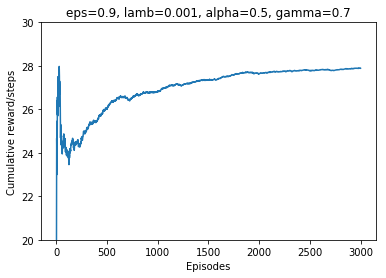

0->1->6->9->11
1->6->9->11
2->7->9->11
3->9->11
4->9->11
5->9->11
6->9->11
7->9->11
8->11
9->11
10->11
11


In [33]:
#Case 0
myQ, myScores = calculateQ_sarsa(eps=0.9, lamb=0.001, alpha=0.5, gamma=0.7, episodes=3000)
plt.plot(myScores)
plt.title('eps=0.9, lamb=0.001, alpha=0.5, gamma=0.7')
plt.xlabel('Episodes')
plt.ylabel('Cumulative reward/steps')
plt.ylim(20,30)
plt.show()
paths = calculatePaths(myQ)
for start_spot in range(12):
    print(paths[start_spot])

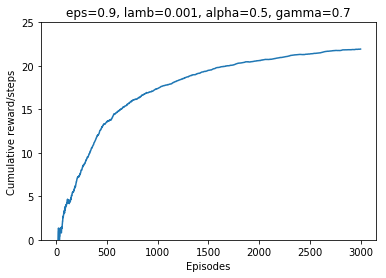

0->6->11
1->10->11
2->7->11
3->11
4->11
5->11
6->11
7->11
8->11
9->11
10->11
11


In [34]:
R = R2
myQ, myScores = calculateQ_sarsa(eps=0.9, lamb=0.001, alpha=0.5, gamma=0.7, episodes=3000)
plt.plot(myScores)
plt.title('eps=0.9, lamb=0.001, alpha=0.5, gamma=0.7')
plt.xlabel('Episodes')
plt.ylabel('Cumulative reward/steps')
plt.ylim(0,25)
plt.show()
paths = calculatePaths(myQ)
for start_spot in range(12):
    print(paths[start_spot])

In [35]:
def calculateQ_sarsa_earlystop(eps, lamb, alpha, gamma):
    Q = np.zeros_like(R) # Resets the Q-matrix
    scores = list(range(1,11))
    cumulative_reward = 0
    step = 0

    while np.var(scores[-11:-1]) > 0.00001:
        # Initialize s:
        state = np.random.randint(12) # Start with a random state from 0 to 11.
        
        # Choose a from s using policy derived from Q:
        p = np.random.uniform() # Random number from 0 to 1. 
        if eps > p:
            #Explore:
            action = np.random.choice([num for num in range(12) if R[state, num] > -100])
        else:
            #Exploit:
            mask = (R[state, :] > -100) # A neat masking trick that allows np.argmax to use conditionals!
            subset_idx = np.argmax(Q[state, :][mask]) 
            action = np.arange(Q.shape[0])[mask][subset_idx]    
        
        while(True):
            #Take action, observe r and next_state
            next_state = action
            
            #Choose next_action from next_state using policy derived from Q:
            p = np.random.uniform() # Random number from 0 to 1. 
            if eps > p:
                #Explore:
                next_action = np.random.choice([num for num in range(12) if R[next_state, num] > -100])
            else:
                #Exploit:
                mask = (R[next_state, :] > -100) # A neat masking trick that allows np.argmax to use conditionals!
                subset_idx = np.argmax(Q[next_state, :][mask]) 
                next_action = np.arange(Q.shape[0])[mask][subset_idx]
            
            #Update Q, note we don't use argmax:
            Q[state, action] += alpha* (R[state, action] + gamma * (Q[next_state, next_action]) - Q[state, action])
            cumulative_reward += R[state,action]
            step += 1
            eps = eps * (1 - lamb)
            if state == 11:
                score = cumulative_reward/step
                scores.append(score)
                break
                
            #Update state and action:
            state = next_state
            action = next_action
            
    Q = np.array([round(num) for li in Q for num in li])
    Q = Q.reshape((12,12))
    return scores

### Experiment on Q-learning vs SARSA:

Again we implement early stopping and conduct 10 trials. We compare case 0 (the base case) and case 7 (base case, with updated R-matrix) for both algorithms.

In [36]:
R = R1
Q = np.zeros_like(R)
episodes_to_converge = []
performance = []
for k in range(10):
    myScores = calculateQ_sarsa_earlystop(eps=0.9, lamb=0.001, alpha=0.5, gamma=0.001)
    episodes_to_converge.append(len(myScores))
    performance.append(myScores[-1])
    
print(np.mean(episodes_to_converge))
print(np.std(episodes_to_converge))
print(np.mean(performance))
print(np.std(performance))

1596.0
234.665293557
24.1301692496
0.278844095159


In [37]:
R = R2
Q = np.zeros_like(R)
episodes_to_converge = []
performance = []
for k in range(10):
    myScores = calculateQ_sarsa_earlystop(eps=0.9, lamb=0.001, alpha=0.5, gamma=0.001)
    episodes_to_converge.append(len(myScores))
    performance.append(myScores[-1])
    
print(np.mean(episodes_to_converge))
print(np.std(episodes_to_converge))
print(np.mean(performance))
print(np.std(performance))

1591.4
182.575025674
18.7945662504
0.713317533954
